# Data Characteristics and Wrangling

In [34]:
#import pandas
import pandas as pd
import matplotlib.pyplot as plt

Pandas Basics

In [63]:
#loading data into pandas dataframe
passengers = pd.read_csv('C:/Users/Nadia/Downloads/passengerData.csv')
ticketprices = pd.read_excel('C:/Users/Nadia/Downloads/ticketPrices.xlsx')

In [64]:
#merging the data
merge = pd.merge(passengers, ticketprices, on='TicketType')
print(merge.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            9         1       3   
2           17         0       3   
3           25         0       3   
4           33         1       3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0   
2                               Rice, Master. Eugene    male   2.0   
3                      Palsson, Miss. Torborg Danira  female   8.0   
4                           Glynn, Miss. Mary Agatha  female   NaN   

   TicketType  Fare  
0           1    33  
1           1    33  
2           1    33  
3           1    33  
4           1    33  


In [65]:
#find the name of the oldest passenger
maxage = merge['Age'].max()
oldest = merge['Name'][(merge.Age == maxage)]
print(oldest)

747    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object


Text(0, 0.5, 'Age of Passengers')

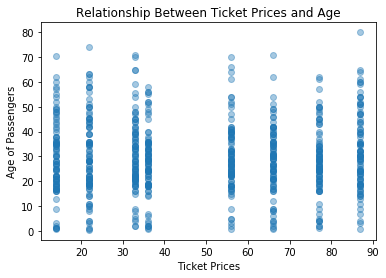

In [93]:
#plot scatter plot of age vs ticket prices
plot1 = plt.scatter(merge['Fare'], merge['Age'], alpha=0.4)
plt.title('Relationship Between Ticket Prices and Age')
plt.xlabel("Ticket Prices")
plt.ylabel('Age of Passengers')

Text(0, 0.5, 'Filtered Age')

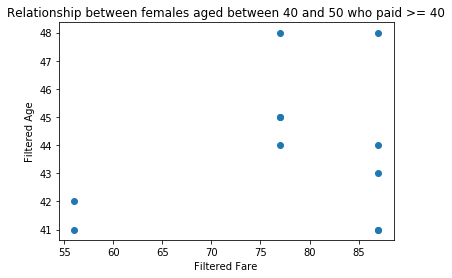

In [94]:
#plot data that only shows females ages between 40 and 50 and who paid more or equal to 40
filtered = merge[((merge.Age > 40) & (merge.Age < 50) & (merge.Fare >= 40) & (merge.Sex == "female"))]
plt.scatter(filtered.Fare, filtered.Age)
plt.title('Relationship between females aged between 40 and 50 who paid >= 40')
plt.xlabel('Filtered Fare')
plt.ylabel('Filtered Age')

Missing Values

In [95]:
#import numpy
import numpy as np

In [96]:
#loading the data into pandas data frame
titanic = pd.read_csv('C:/Users/Nadia/Downloads/titanicSurvival_m.csv')

In [97]:
#find counts of missing values in each column 
missing = (pd.isnull(titanic)).sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            46
Cabin          687
Embarked         2
dtype: int64


In [98]:
#compute the mean and other descriptive statistics 
stats = titanic.describe()
print(stats)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  845.000000  
mean     0.381594   32.304319  
std      0.806057   49.792612  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.275000  
max      6.000000  512.329200  


[Text(0.5, 1.0, 'Missing = Mean')]

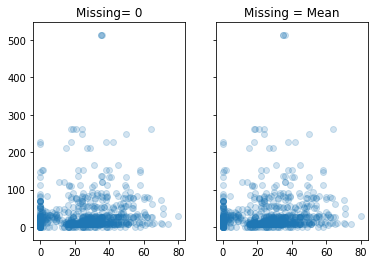

In [116]:
#replacing missing values in 'Age' and 'Fare' columns with 0, then mean, and visualise
zeroage = titanic['Age'].fillna(0)
zerofare = titanic['Fare'].fillna(0)
agemean = titanic['Age'].fillna(stats['Age']['mean'])
faremean = titanic['Fare'].fillna(titanic['Fare'].mean())

fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True)
ax1.scatter(zeroage,zerofare, alpha=0.2)
ax1.set(title = "Missing= 0")
ax2.scatter(agemean, faremean, alpha = 0.2)
ax2.set(title = "Missing = Mean")

Transformations

In [117]:
#load data
tb = pd.read_csv('C:/Users/Nadia/Downloads/TB_burden_countries_2014-09-29.csv')

In [118]:
#check for missing values
missingtb = (pd.isnull(tb)).sum()
print(missingtb)

country                        0
iso2                          23
iso3                           0
iso_numeric                    0
g_whoregion                    0
year                           0
e_pop_num                      0
e_prev_100k                   11
e_prev_100k_lo                11
e_prev_100k_hi                11
e_prev_num                    11
e_prev_num_lo                 11
e_prev_num_hi                 11
e_mort_exc_tbhiv_100k          1
e_mort_exc_tbhiv_100k_lo       1
e_mort_exc_tbhiv_100k_hi       1
e_mort_exc_tbhiv_num           1
e_mort_exc_tbhiv_num_lo        1
e_mort_exc_tbhiv_num_hi        1
source_mort                    1
e_inc_100k                     1
e_inc_100k_lo                  1
e_inc_100k_hi                  1
e_inc_num                      1
e_inc_num_lo                   1
e_inc_num_hi                   1
e_tbhiv_prct                1250
e_tbhiv_prct_lo             1446
e_tbhiv_prct_hi             1446
e_inc_tbhiv_100k            1306
e_inc_tbhi

In [124]:
#replacing values in chosen column with mean
tbcol = tb.e_prev_100k_hi.fillna(tb.e_prev_100k_hi.mean())
tbcol.head()

0    655.0
1    613.0
2    693.0
3    724.0
4    751.0
Name: e_prev_100k_hi, dtype: float64

Text(0.5, 1.0, 'e_prev_100k_hi')

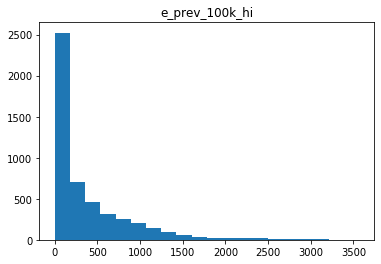

In [133]:
#visualise on a histogram that has 20 bins
plt.hist(tbcol, 20)
plt.title("e_prev_100k_hi")

Text(0.5, 1.0, 'normalised e_prev_100k_hi')

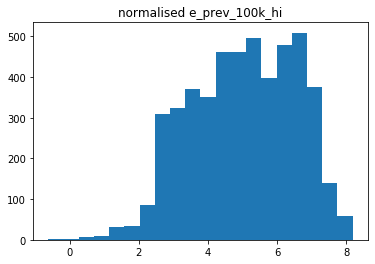

In [136]:
#Apply log transformation on the data and visualise
#normalise using the apply function
normalised = tbcol.apply(np.log)
plt.hist(normalised, 20)
plt.title("normalised e_prev_100k_hi")

In [138]:
#choose numerical collumns and fill all missing values
tbfill = tb.fillna(tb.mean())
tbNum =tbfill.select_dtypes(include='number')
print(tbNum)

      iso_numeric  year  e_pop_num  e_prev_100k  e_prev_100k_lo  \
0               4  1990   11731193        327.0           112.0   
1               4  1991   12612043        359.0           172.0   
2               4  1992   13811876        387.0           169.0   
3               4  1993   15175325        412.0           186.0   
4               4  1994   16485018        431.0           199.0   
...           ...   ...        ...          ...             ...   
4898          716  2008   12784041        445.0            56.0   
4899          716  2009   12888918        423.0            49.0   
4900          716  2010   13076978        438.0            70.0   
4901          716  2011   13358738        458.0            93.0   
4902          716  2012   13724317        433.0            92.0   

      e_prev_100k_hi  e_prev_num  e_prev_num_lo  e_prev_num_hi  \
0              655.0     38000.0        13000.0        77000.0   
1              613.0     45000.0        22000.0        77000.0 

In [140]:
# This will range normalise each
tbNumnormalised=(tbNum-tbNum.min())/(tbNum.max()-tbNum.min())
print(tbNumnormalised.head())

   iso_numeric      year  e_pop_num  e_prev_100k  e_prev_100k_lo  \
0          0.0  0.000000   0.008518     0.175691        0.085051   
1          0.0  0.045455   0.009158     0.192898        0.130646   
2          0.0  0.090909   0.010029     0.207954        0.128366   
3          0.0  0.136364   0.011019     0.221397        0.141285   
4          0.0  0.181818   0.011970     0.231613        0.151164   

   e_prev_100k_hi  e_prev_num  e_prev_num_lo  e_prev_num_hi  \
0        0.183607    0.008261        0.00325       0.014808   
1        0.171824    0.009783        0.00550       0.014808   
2        0.194268    0.011522        0.00575       0.018462   
3        0.202965    0.013478        0.00700       0.021154   
4        0.210540    0.015435        0.00825       0.023077   

   e_mort_exc_tbhiv_100k  ...  e_tbhiv_prct_hi  e_inc_tbhiv_100k  \
0               0.140271  ...         0.131186          0.000304   
1               0.158371  ...         0.131186          0.000313   
2       